# Import relevant libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

# Load the data

In [5]:
data = pd.read_csv("3.12. Example.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


# Plot the data

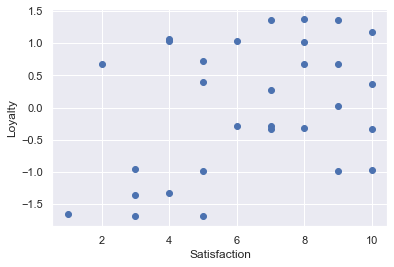

In [7]:
plt.scatter(data["Satisfaction"],data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

# Select the features

In [8]:
x = data.copy()

# Clustering

In [9]:
kmeans = KMeans()
kmeans.fit(x)

KMeans()

# Clustering results

In [10]:
clusters = x.copy()
clusters["cluster_pred"] = kmeans.fit_predict(x)

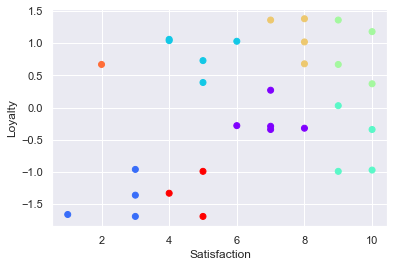

In [12]:
plt.scatter(data["Satisfaction"],data["Loyalty"], c=clusters["cluster_pred"], cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [14]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# Take advantage of the Elbow method

In [15]:
WCSS = []

for i in range (1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)
    
WCSS

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.531126526734054,
 4.430999057496253,
 3.785174850151503]

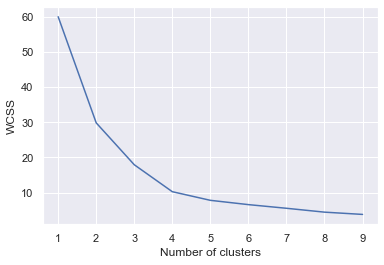

In [16]:
plt.plot(range(1, 10), WCSS)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Explore clustering solutions and select the number of clusters

In [30]:
kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new["cluster_pred"] = kmeans_new.fit_predict(x_scaled)

In [31]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,8
1,6,-0.28,1
2,5,-0.99,8
3,7,-0.29,1
4,4,1.06,4
5,1,-1.66,0
6,10,-0.97,6
7,8,-0.32,1
8,8,1.02,5
9,8,0.68,5


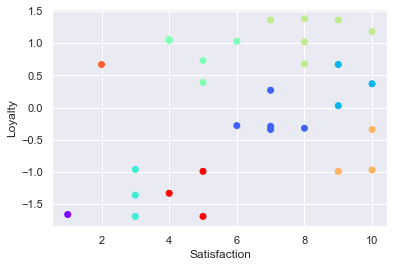

In [32]:
plt.scatter(data["Satisfaction"],data["Loyalty"], c=clusters_new["cluster_pred"], cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()